In [1]:
# se importa las ribrerias(modulos) necesarios para  el analisis exploratorio de  datos para determinar la calidad del dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
'''
from keras.models import load_model
import keras.backend as K

from sklearn.preprocessing import SplineTransformer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, roc_curve
from sklearn import linear_model
from scipy.spatial import distance
'''
warnings.filterwarnings('ignore')

In [2]:
# cargar  archivo de datos 
data = pd.read_csv("Data/IG Data Scientist Challenge.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  object 
 17  R       16880 non-null  object 
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  object 
 20  Fraude  16880 non-null  int64  
dtypes: float64(5), int64(12), object(4)


### Que se observa inicialmente en el dataset ?
Utilizando la función `info()` de  pandas, podemos observar que se tiene un total de 16880 registros correspondientes a transacciones realizadas en la plataforma de pago. Ademas, se evidencia valores nulos en las columnas `C` y la `K`

In [3]:
data.head()# observr los primeros 5 registros del dataset completo

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0,0,7.25,37.51,1
1,0,10,29014.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,3,0,0,11.66,8.18,1
2,0,7,92.0,0,1,0.0,0.0,0,1,UY,...,0,3,1,0,2,0,0,86.97,13.96,1
3,9,16,50269.0,0,0,0.0,0.0,0,0,UY,...,0,3,1,0,5,0,0,2.51,93.67,1
4,0,8,8180.0,0,0,0.0,0.0,0,0,UY,...,0,1,1,0,1,0,0,25.96,135.4,1


In [4]:
# Se realiza  analisis basico de valores nulos,  para asi determinar que porcentaje de informacion se tiene perdida

import matplotlib.gridspec as gridspecdatos 

total = data.isnull().sum().sort_values(ascending = False) # se determina el conteo de valores nulos por columnas,  se ordena de forma ascendente.

porcentaje_nulos = (data.isnull().sum() / data.isnull().count().sort_values(ascending = False))  # se calcula el porcentaje de valores perdidos por columna.

datos_faltantes = pd.concat([total, porcentaje_nulos*100], axis = 1, keys = ['Total','Porcentaje'])# se concatena  el total de registros perdidos con su correspondiente porcentaje.

print('-------------------------------------',
      'Los Datos Faltantes del Dataset son :',
      total,
      'El % de Datos Faltantes del Dataset: ',
      datos_faltantes[datos_faltantes['Total']>0], sep = '\n')

-------------------------------------
Los Datos Faltantes del Dataset son :
K         12864
C          3197
L             0
Monto         0
S             0
R             0
Q             0
P             0
O             0
N             0
M             0
A             0
B             0
J             0
I             0
H             0
G             0
F             0
E             0
D             0
Fraude        0
dtype: int64
El % de Datos Faltantes del Dataset: 
   Total  Porcentaje
K  12864   76.208531
C   3197   18.939573



### Se identifico importancia de valores nulos ?
Se observa que en la columna `K`  se presenta la mayor cantidad de datos faltantes, siendo este de 12864 ( un total del 76.20 %) y el campo `C` con un total de 3197 datos perdidos( 18.93%). Por ende,  se recomienda descartar la columna K del analisis y en la columna C aplicar metodo de Imputación de datos 

In [5]:
# se realiza tranformación sobre los campos Q, R y monto. los cuales inicialmente se encuentran en formato string y se cambia a numerico.
# con el objetivo de realizar calculos operacionales descriptivos.
data['Q'] = pd.to_numeric(data['Q'],errors = 'coerce')
data['Monto'] = pd.to_numeric(data['Q'],errors = 'coerce')
data['R'] = pd.to_numeric(data['Q'],errors = 'coerce')

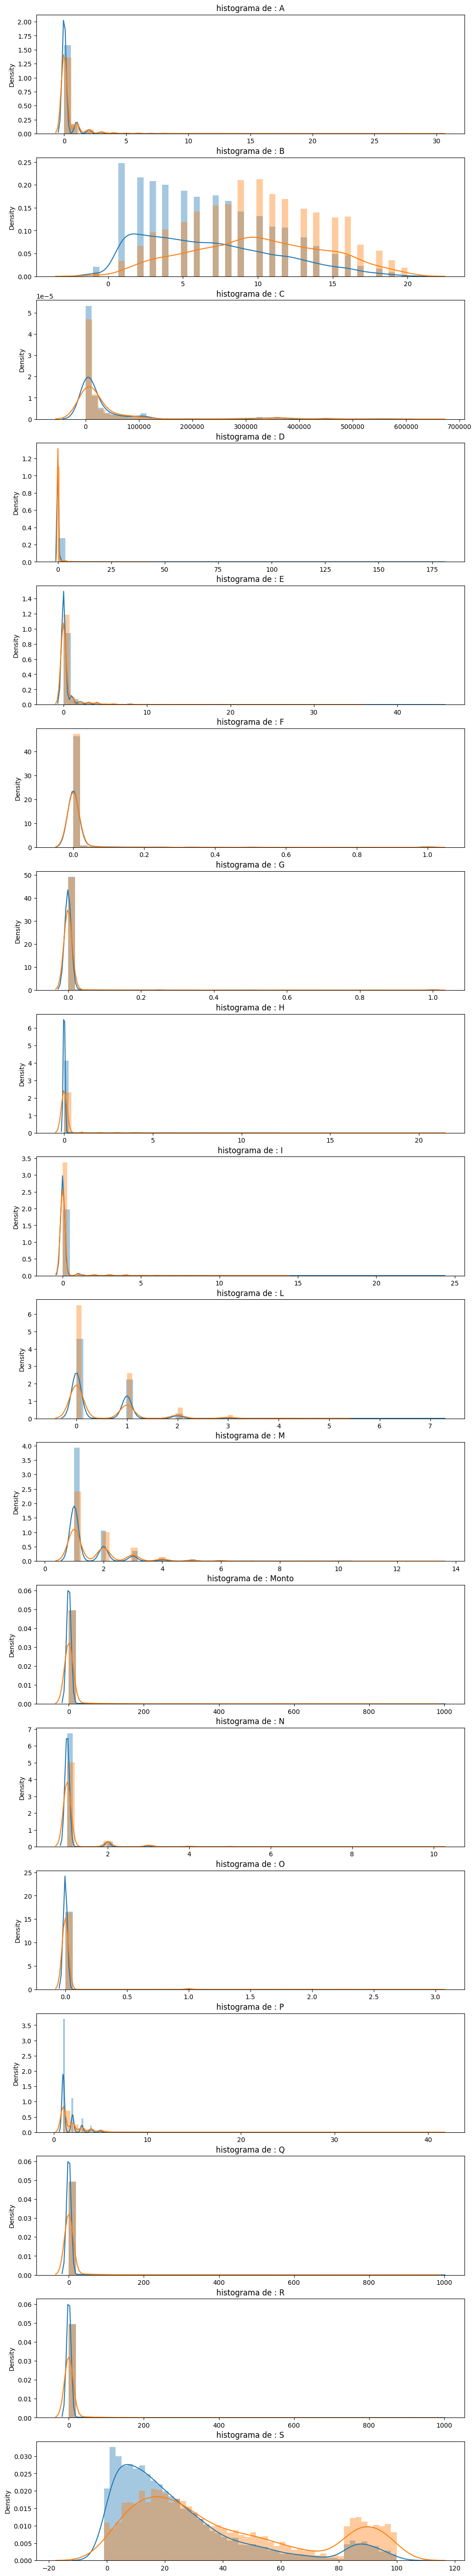

In [6]:
#Grafico de los histogramas por cada caracteristica
import matplotlib.gridspec as gridspec

v_features =  data.columns.difference(['J','K','Fraude'])
#v_features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N','O', 'P', 'Q', 'R', 'S', 'Monto']

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Fraude== 0], bins=50)
    sns.distplot(data[cn][data.Fraude == 1], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de : ' + str(cn))
plt.show()

Se observa en las graficas de distribucion que se presenta una diferencia notable en las variables `B` y `S`, realizando division por el tipo de  transaccion ( fraudo o no fraude). implicando que se puede sospechar de una influencia fuerte. Por otro lado, en las  demas  variables, se determina una tendencia  distribucional semegante y asimetrica con colas pesadas a la derecha.

In [7]:
#Grafica comparativa de transacciones fraudulentas Vs transacciones no fraudulentas
def barpot_fraude_Vs_nofraude(data_):
    " data : dataframe de pandas con la informacion de  los registros a  analizar"
    
    counts = data_.Fraude.value_counts() # realizar resumen de conteos por cada estado de transaccion, fraude o no fraude.
    normal = counts[0]
    fraudulent = counts[1]
    perc_normal = (normal/(normal+fraudulent))*100
    perc_fraudulent = (fraudulent/(normal+fraudulent))*100
    print('Hay {} transacciones no fraudulentas ({:.3f}%) y {} transacciones fraudulentas ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))
    
    plt.figure(figsize=(12,10))
    sns.barplot(x=counts.index, y=counts)
    plt.title('Cantidad de transacciones fraudulentas Vs. No fraudulentas')
    plt.ylabel('Cantidad')
    plt.xlabel('0:No fraudulenta, 1:Fraudulenta')
    plt.show()

Hay 12269 transacciones no fraudulentas (72.684%) y 4611 transacciones fraudulentas (27.316%).


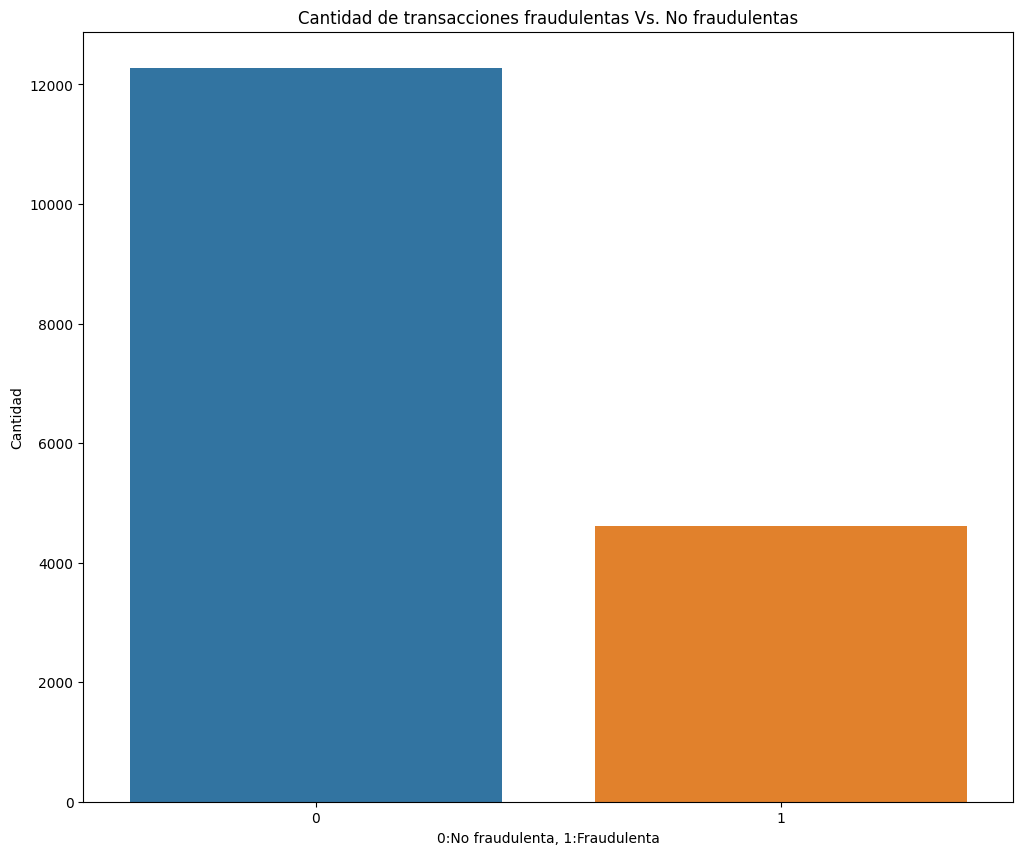

In [8]:
barpot_fraude_Vs_nofraude(data) # despliegue de resultado obtenido utilizando la funcion barpot_fraude_Vs_nofraude()

Se identifico un desbalanceo de clases ( fraude Vs no Fraude), dando señales de que se debe realizar metodos de tranformacion de data para balance de la participacion de las clases de interes.

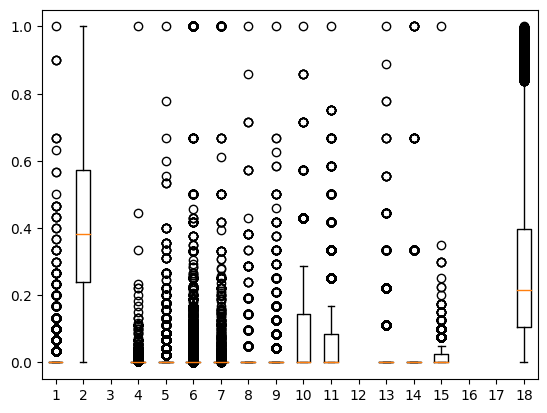

In [9]:
#  boxplot para cada variable y poder analisar la presencia de posibles outlier en las variables.
# como primer paso,  se  realiza un procesamiento de variables que permita  observar el comportamiento en una misma escala de medicion
# siendo asi, la necesidad de aplicar el metodo de MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

df = data[v_features]

scaler = MinMaxScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df))
df_scaler.columns =  v_features

plt.boxplot(df_scaler)
plt.show()

Analizando el boxplot anterior, se evidencia una gran influencia distribucional por valores atipicos, dando asi evidencia 
suficiente para realizar ajustes y eliminar datos de no interes.

In [10]:
df.describe()# realizamos un analisis descriotivo por variable, donde  nos permita identificar patrones claves en la distribucion

,A,B,C,D,E,F,G,H,I,L,M,Monto,N,O,P,Q,R,S
count,16880.000000,16880.000000,13683.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16880.000000,16856.000000,16880.000000,16880.000000,16880.000000,16856.000000,16856.000000,16880.000000
mean,0.309242,7.645379,39235.339984,0.198697,0.433709,0.015878,0.005200,0.050296,0.144076,0.432346,1.544135,6.344022,1.091765,0.009419,1.630865,6.344022,6.344022,29.127720
std,1.094064,4.686494,91045.252879,2.042959,1.537297,0.098730,0.059419,0.531060,0.824761,0.663860,1.022385,46.754031,0.408081,0.116606,1.088286,46.754031,46.754031,26.510548
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,0.000000,4.000000,1172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.560000
50%,0.000000,7.000000,6173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.640000
75%,0.000000,11.000000,26888.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,39.212500
max,30.000000,20.000000,617324.000000,180.000000,45.000000,1.000000,1.000000,21.000000,24.000000,7.000000,13.000000,984.420000,10.000000,3.000000,41.000000,984.420000,984.420000,99.970000


In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,A,B,C,D,E,F,G,H,I,L,M,Monto,N,O,P,Q,R,S
A,1.000000,0.055291,0.045490,-0.005041,0.019270,-0.002445,-0.002783,0.003003,0.007283,0.023668,0.105700,0.020428,0.019903,0.001779,0.063436,0.020428,0.020428,0.028230
B,0.055291,1.000000,0.023212,0.021728,0.082079,-0.031943,-0.028429,0.034733,0.082884,-0.131299,0.088832,-0.057044,-0.007023,0.024326,0.110381,-0.057044,-0.057044,0.351585
C,0.045490,0.023212,1.000000,0.013182,0.005867,-0.002689,-0.005184,0.017723,0.011219,-0.003927,0.002085,-0.001397,0.017504,0.001802,-0.011952,-0.001397,-0.001397,0.030964
D,-0.005041,0.021728,0.013182,1.000000,0.059409,0.005598,0.096550,0.425953,0.046686,0.038787,0.029867,0.008412,0.031710,0.086897,0.001601,0.008412,0.008412,0.058087
E,0.019270,0.082079,0.005867,0.059409,1.000000,0.139269,0.031437,0.096936,0.666150,-0.012145,0.069486,-0.005592,0.011445,0.036699,0.094495,-0.005592,-0.005592,0.123635
F,-0.002445,-0.031943,-0.002689,0.005598,0.139269,1.000000,0.077526,-0.003926,0.018162,0.011136,0.077334,0.008924,0.023745,0.002287,0.058667,0.008924,0.008924,-0.051115
G,-0.002783,-0.028429,-0.005184,0.096550,0.031437,0.077526,1.000000,0.016167,0.003822,0.015054,0.029786,0.011036,0.009699,0.012195,0.025450,0.011036,0.011036,-0.021307
H,0.003003,0.034733,0.017723,0.425953,0.096936,-0.003926,0.016167,1.000000,0.110873,0.017803,0.014189,0.023460,0.041032,0.010527,-0.002010,0.023460,0.023460,0.130371
I,0.007283,0.082884,0.011219,0.046686,0.666150,0.018162,0.003822,0.110873,1.000000,-0.019852,0.020352,0.005108,0.008067,0.014841,0.033580,0.005108,0.005108,0.187436
L,0.023668,-0.131299,-0.003927,0.038787,-0.012145,0.011136,0.015054,0.017803,-0.019852,1.000000,0.130577,0.243700,0.463909,0.043056,0.010820,0.243700,0.243700,-0.009605


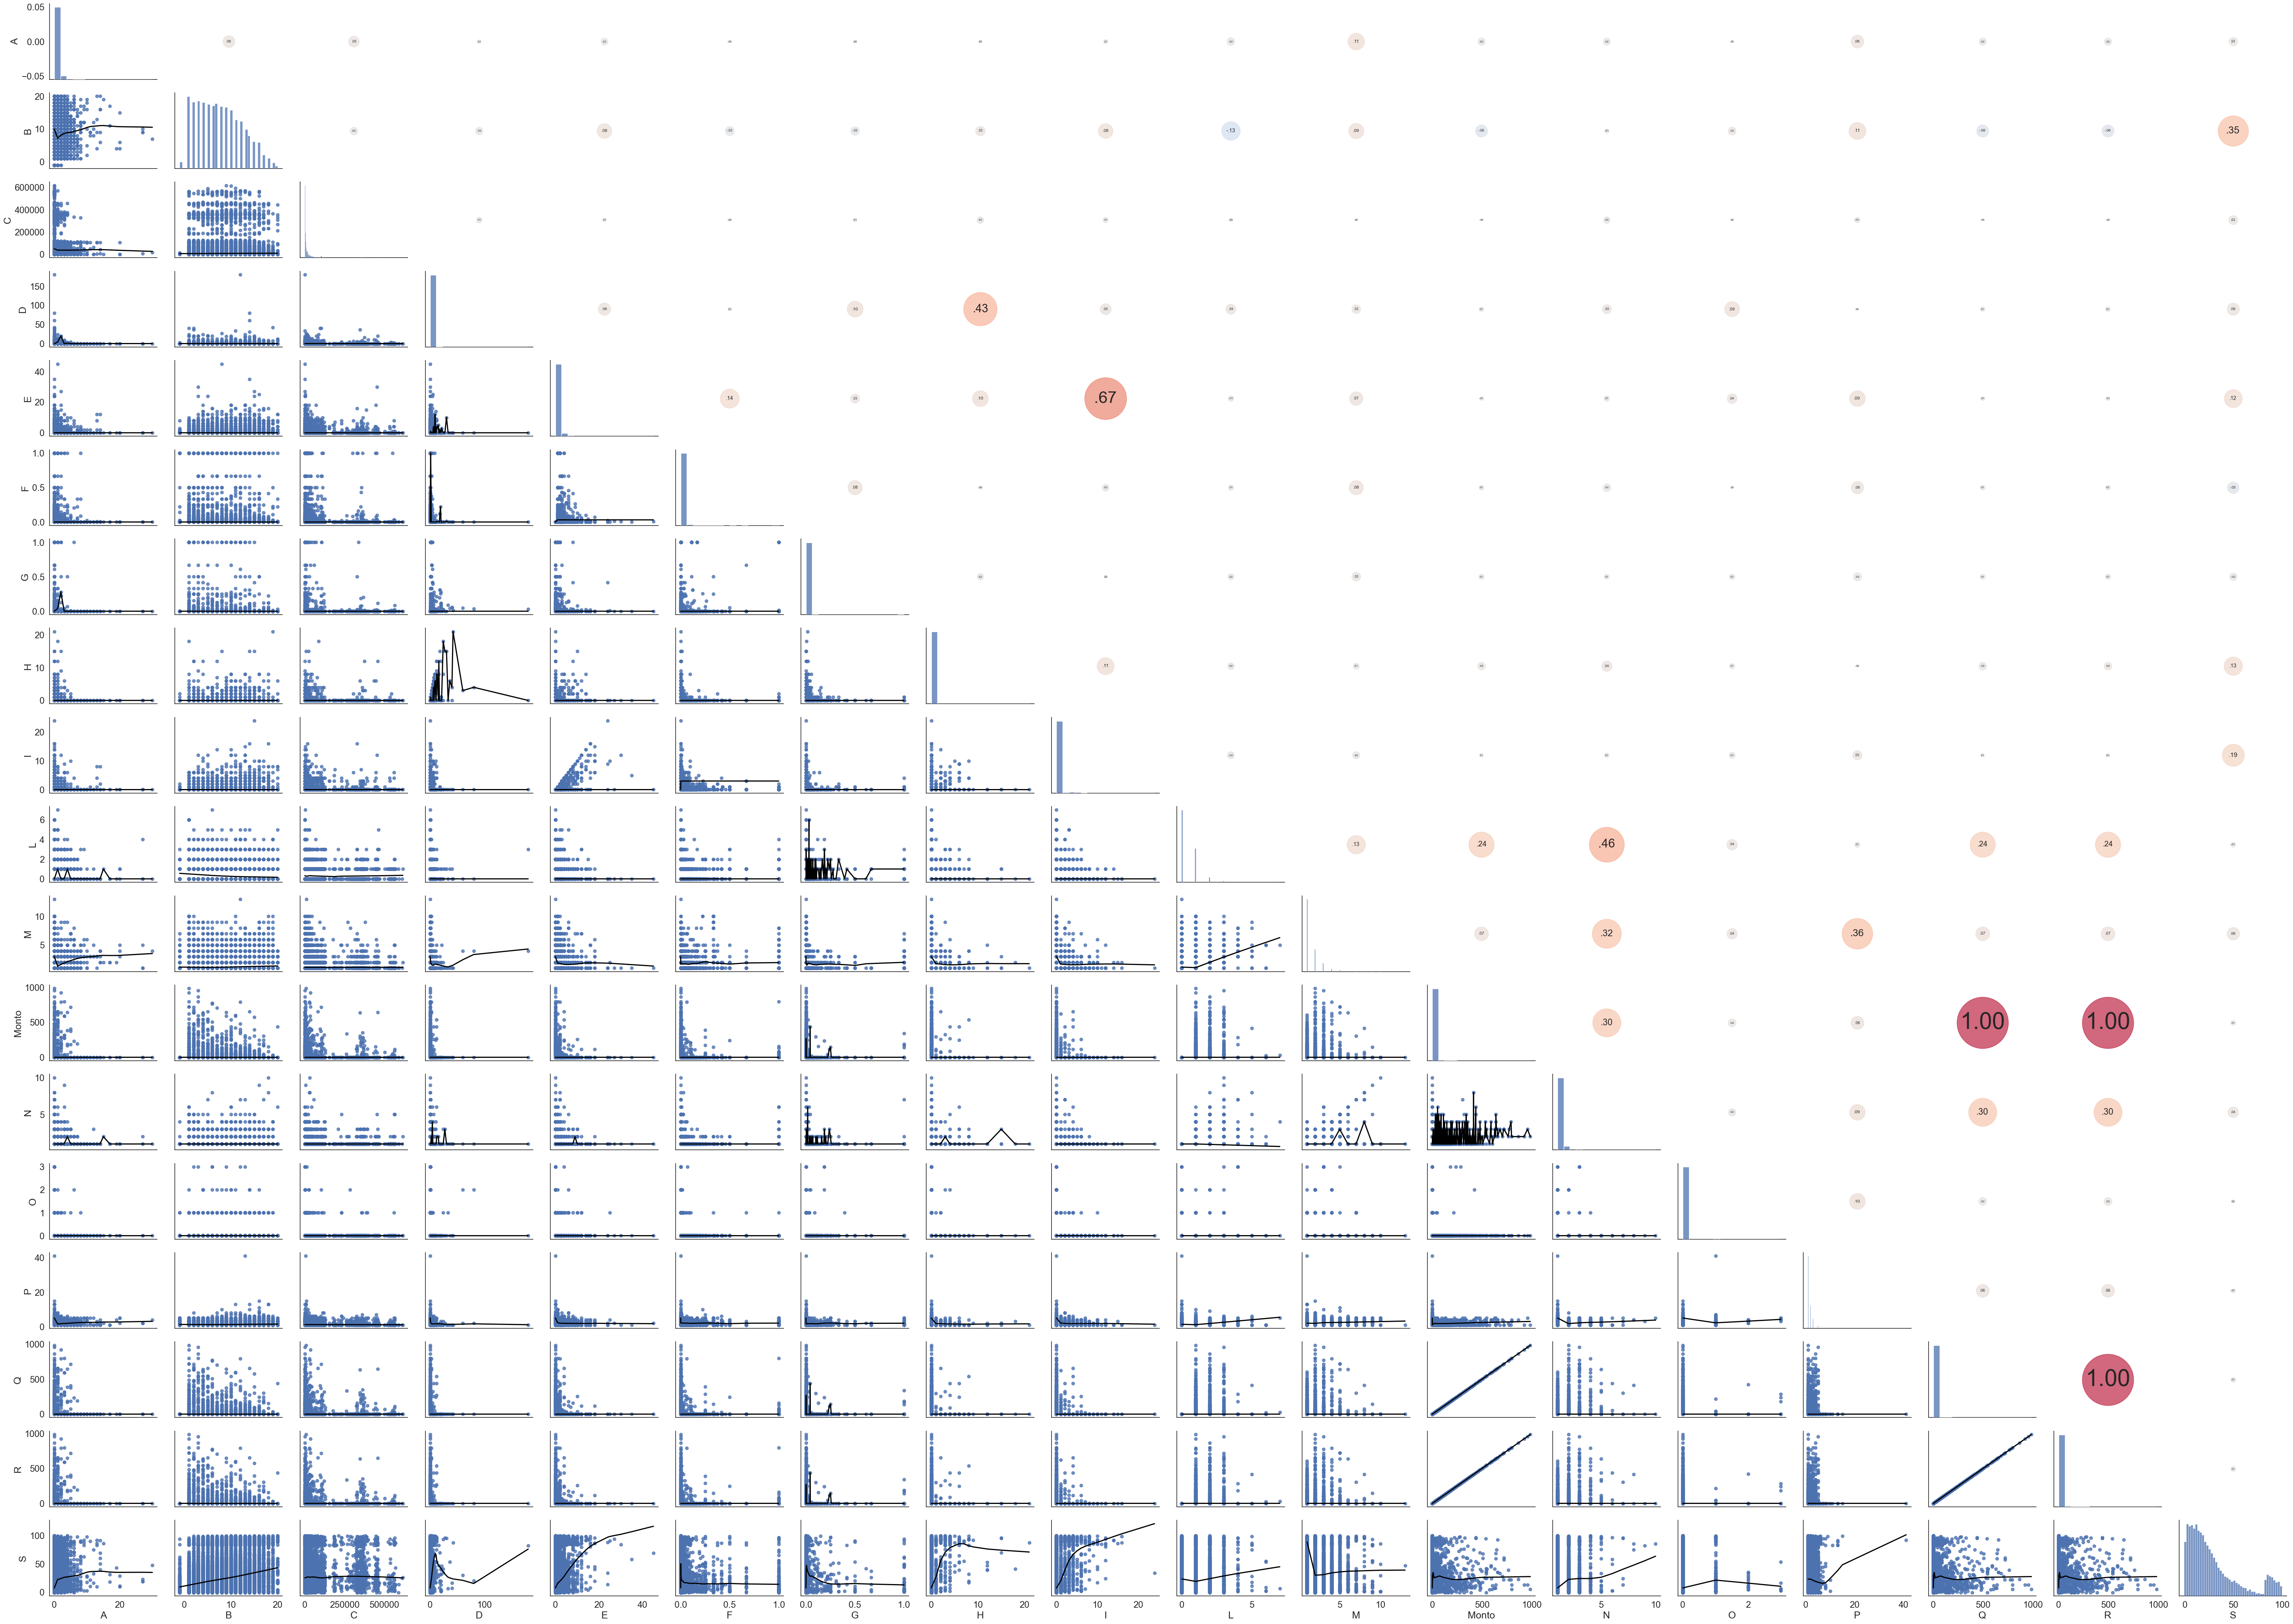

In [12]:
# grafico de  tendencias por cada par de  sensores  registrados, con su respectiva  linea  de  tenddencia y correlacion asignada
warnings.filterwarnings('ignore')
cols = df.columns
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
#iris = sns.load_dataset('iris')
g = sns.PairGrid(df[cols], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

#sns.pairplot(df[cols], markers='+')
plt.show()


Realizando el calculo de  la matriz de correlacion, se evidencia  una leve relacion entre las variables de interes para el analisis, exceptuando una relacion significativa entre D -H (0.425)  , E-I( 0.666), L - M(0.463), N-L(0.463) , S-A(0.35),  P-M(0.35), Monto - P (1) y Monto - Q (1)  basadas en comportamientos lineales medibles por medio del `indice de pearson`, por tal razon, se recomienda analizar el espacio vectorial en proyeciones de las variables sobre el plano unitario, y asi ver que tan similitud hay en el comportamiento del conjunto de datos. Para ello,  se recomienda calcular el indice de similitud no lineal( por medio de la diferencia del coseno).

In [13]:
from scipy.spatial import distance
def distance_cosine(x, y):
    '''
    x: array de datos correspondientes a  la variable aleatoria principal a evaluar
    y: array de datos correspondientes a  la variable aleatoria a contrastar
    '''
    x = np.asarray(x)
    y = np.asarray(y)
    similarity = 1-distance.cosine(x,y)
    return similarity

In [14]:
# distancia/similaridad(indicador no lineal de correlacion) 
m = []
cols = df.columns
for i in cols:
    for j in cols:
        m.append(distance_cosine(df[i], df[j]))# Se calcula la distancia coseno entre el angulo formado por los vectores i ^ j de interes 
similarity = pd.DataFrame(np.reshape(m, (len(cols),len(cols))), index = cols) # se almacena los calculos del indice de similadirar
similarity.columns = cols
similarity.style.background_gradient(cmap='coolwarm')    

,A,B,C,D,E,F,G,H,I,L,M,Monto,N,O,P,Q,R,S
A,1.000000,0.259711,1.000000,0.021503,0.091705,0.040869,0.021048,0.028525,0.053712,0.167530,0.282952,1.000000,0.261495,0.023608,0.260140,1.000000,1.000000,0.219449
B,0.259711,1.000000,1.000000,0.093836,0.272785,0.118900,0.059534,0.098460,0.189386,0.407790,0.736514,1.000000,0.797331,0.081321,0.741203,1.000000,1.000000,0.754205
C,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
D,0.021503,0.093836,1.000000,1.000000,0.083195,0.020873,0.104171,0.431191,0.062433,0.085180,0.097128,1.000000,0.101728,0.094003,0.081408,1.000000,1.000000,0.110508
E,0.091705,0.272785,1.000000,0.083195,1.000000,0.175453,0.053815,0.118482,0.678285,0.138392,0.263325,1.000000,0.258203,0.057070,0.276344,1.000000,1.000000,0.280906
F,0.040869,0.118900,1.000000,0.020873,0.175453,1.000000,0.090095,0.011113,0.044990,0.095872,0.174552,1.000000,0.156949,0.015036,0.164235,1.000000,1.000000,0.083467
G,0.021048,0.059534,1.000000,0.104171,0.053815,0.090095,1.000000,0.024255,0.018755,0.060149,0.089079,1.000000,0.085053,0.019129,0.086596,1.000000,1.000000,0.050194
H,0.028525,0.098460,1.000000,0.431191,0.118482,0.011113,0.024255,1.000000,0.124958,0.066309,0.086418,1.000000,0.102624,0.018038,0.077321,1.000000,1.000000,0.157094
I,0.053712,0.189386,1.000000,0.062433,0.678285,0.044990,0.018755,0.124958,1.000000,0.077528,0.154555,1.000000,0.163977,0.028429,0.161505,1.000000,1.000000,0.251548
L,0.167530,0.407790,1.000000,0.085180,0.138392,0.095872,0.060149,0.066309,0.077528,1.000000,0.515449,1.000000,0.647302,0.079905,0.458988,1.000000,1.000000,0.398192


Un aspecto relevante en el dataset, es que cuando se  realiza  el indice de similitud ( distancia del coseno) sobre las proyecciones  vectoriales del dataset ( considerando las parejas de puntos [i, j]) se determina que hay alto grado de asociacion o dependencia no lineal entre las variables analisadas para determinar el comportamiento de cada transaccion registrada en el portal. Adcionalmete, lo mas notable es que el Monto transacciona tiene mucha asociacion con las demas variables.

A continuacion, Se asume que L-M -N son variables categoricas codificadas de forma ordinal( dado el comportamiento que  se ve en los registros y sus escalas); por tal razon, se realiza el grafico de barras de estas variables y el de la ubicacion en la que se realizo la transaccion ( columna J) 

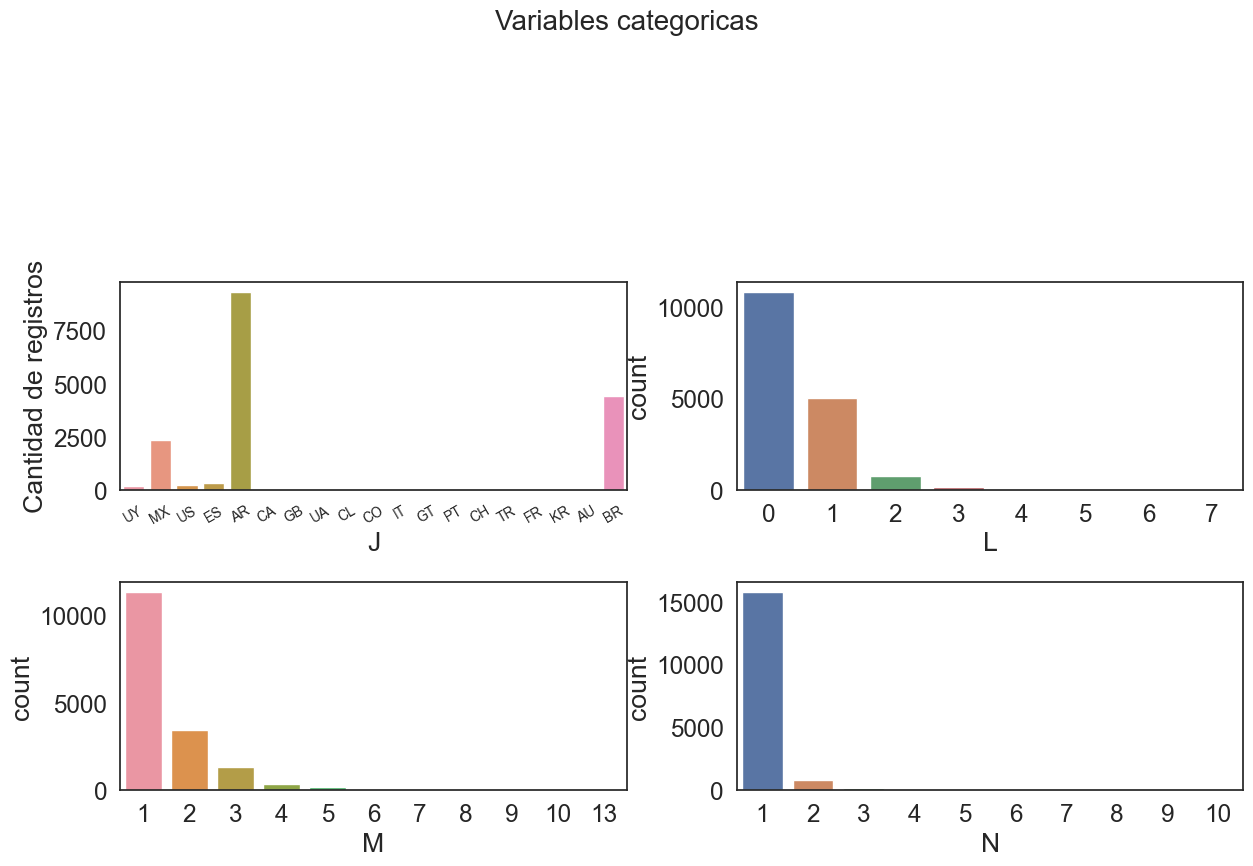

In [15]:
# colunas  de  interes
columns = ['J', 'L', 'M', 'N']

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()): # se hace un for para iterar sobre el vector columns para  filtrar por subsets el dataframe
    sns.countplot(x = data[col], ax=subplot)
    if col=="J": # condicional que se colca al campo J para  poder realizar una rotacion en el eje X para visualizar mejor las etiquetas.
        sns.countplot(x = data[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation = 30, size = 10)
        subplot.yaxis.label.set_text("Cantidad de registros")
        
# mustrar  figura y plots
fig.suptitle("Variables categoricas", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()


In [16]:
data.J.value_counts() 

AR    9329
BR    4428
MX    2366
ES     314
US     230
UY     180
CA      12
GB       8
GT       2
FR       2
UA       1
CL       1
IT       1
PT       1
CH       1
TR       1
KR       1
AU       1
CO       1
Name: J, dtype: int64

En el grafico anterior,  se infiere que las frecuencia de las transacciones registradas corresponden a la ubicacion AR ( 9329 tranferencias) en la mayoria, ademas de que la segunda localidad que tiene mas aporte en el area transaccional de la plataforma de pagos es BR( 4428 transferencias). Adicionalmente, se observa que hay varias localidades con un minimo de transacciones registradas( con una sola) como lo son: `CL, IT, AU, CL, PT, CH, TR, KR, AU, CO`, induciendo a que se piense que puede afectar en el ajuste de modelos analiticos debido a baja representatividad en la muestra.